In [1]:
!pip install mediapipe

In [2]:
import cv2
import matplotlib.pyplot as plt
import mediapipe

In [4]:
image = cv2.imread('image001.png')

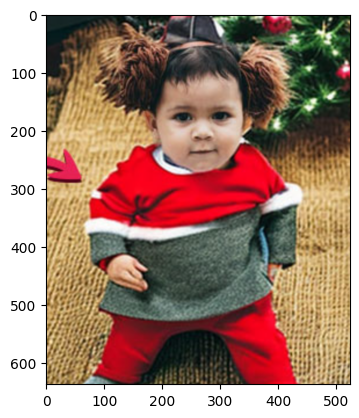

In [7]:
plt.imshow(image[:,:,::-1])

In [9]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode = True)

results = face_mesh.process(image[:,:,::-1])
landmarks = results.multi_face_landmarks[0]

landmarks

c:\Users\DELL\anaconda3\envs\facetry\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


landmark {
  x: 0.51930815
  y: 0.362757266
  z: -0.0300924592
}
landmark {
  x: 0.518458664
  y: 0.333594531
  z: -0.0626682863
}
landmark {
  x: 0.517980576
  y: 0.342081666
  z: -0.0308962185
}
landmark {
  x: 0.507217407
  y: 0.304933935
  z: -0.0502003208
}
landmark {
  x: 0.518323541
  y: 0.324722946
  z: -0.067507185
}
landmark {
  x: 0.51766324
  y: 0.31301102
  z: -0.0637361258
}
landmark {
  x: 0.515738726
  y: 0.284233689
  z: -0.0353915878
}
landmark {
  x: 0.429060966
  y: 0.281936437
  z: 0.00689275097
}
landmark {
  x: 0.515092254
  y: 0.263789594
  z: -0.0305389687
}
landmark {
  x: 0.515063047
  y: 0.251529813
  z: -0.0347190276
}
landmark {
  x: 0.513181
  y: 0.198845953
  z: -0.0262003038
}
landmark {
  x: 0.519509077
  y: 0.366811603
  z: -0.0282735173
}
landmark {
  x: 0.519383609
  y: 0.369427353
  z: -0.0240058284
}
landmark {
  x: 0.519092619
  y: 0.370196164
  z: -0.0184209701
}
landmark {
  x: 0.519055784
  y: 0.372685671
  z: -0.0155524779
}
landmark {
  x: 0

In [12]:
import pandas as pd

mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode = True)

results = face_mesh.process(image[:,:,::-1])
landmarks = results.multi_face_landmarks[0]

landmarks

face_oval = mp_face_mesh.FACEMESH_FACE_OVAL

df = pd.DataFrame(list(face_oval), columns = ['p1', 'p2'])

df.head()

df.shape


routes_idx = []

p1 = df.iloc[0]['p1']
p2 = df.iloc[0]['p2']

for i in range(0, df.shape[0]):
    obj = df[df['p1'] == p2]
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]

    current_route = []
    current_route.append(p1)
    current_route.append(p2)
    routes_idx.append(current_route)



for route_idx in routes_idx[0:5]:
    print(f"draw line {route_idx[0]} landmark {route_idx[1]} landmark point")

draw line 149 landmark 150 landmark point
draw line 150 landmark 136 landmark point
draw line 136 landmark 172 landmark point
draw line 172 landmark 58 landmark point
draw line 58 landmark 132 landmark point


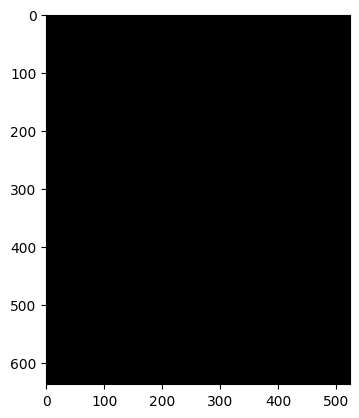

In [16]:
import numpy as np

routes = []
for source_idx, target_idx in routes_idx:
	source = landmarks.landmark[source_idx]
	target = landmarks.landmark[target_idx]
	relative_source = (int(source.x + image.shape[1]), int(source.y + image.shape[0]))
	relative_target = (int(target.x + image.shape[1]), int(target.y + image.shape[0]))
	routes.append(relative_source)
	routes.append(relative_target)

routes[0:5]

mask = np.zeros((image.shape[0], image.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)

out = np.zeros_like(image)
out[mask] = image[mask]

plt.imshow(out[:,:,::-1])

In [1]:
import cv2
import face_alignment
from skimage import io

# Initialize the face alignment pipeline
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

# Load the image
image_path = 'image001.png'
input_image = io.imread(image_path)

# Detect landmarks
landmarks = fa.get_landmarks(input_image)

# Visualize landmarks
if landmarks is not None:
    for landmark in landmarks:
        for (x, y) in landmark:
            cv2.circle(input_image, (x, y), 2, (255, 0, 0), -1)

# Save the image with landmarks
cv2.imwrite('landmarks_output.jpg', input_image)


AttributeError: _2D